In [4]:
import sys
sys.path.append("../..")

import pandas

from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pandas import DataFrame

# Import dictonaries and Types
from app.components.basic_dataframes import dictMealState, dfMealCode, dfMealState
from app.components.simple_types import Nutrition, State
from app.components.extract_data.extract_data import *

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult

Loading basic data
Loading basic dictionary
Finish!


In [5]:

dfPerson = getDfPerson()
male25 = dfPerson[ (dfPerson["AGE"]==25) & (dfPerson["GENDER"]=="male") ]["PESSOA"].to_list()
male60 = dfPerson[ (dfPerson["AGE"]==60) & (dfPerson["GENDER"]=="male") ]["PESSOA"].to_list()
female25 = dfPerson[ (dfPerson["AGE"]==25) & (dfPerson["GENDER"]=="female") ]["PESSOA"].to_list()
female60 = dfPerson[ (dfPerson["AGE"]==60) & (dfPerson["GENDER"]=="female") ]["PESSOA"].to_list()

In [ ]:
people = male25

personID = people[1]
personID = people[0]
# personID = 'UNKNOW'

print("people:", people)
print("personID:", personID)

Exemplo com 1 gráfico:


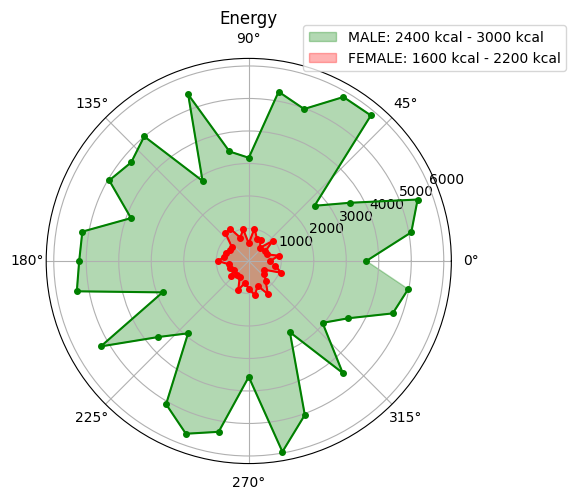

Exemplo com 2 gráficos:


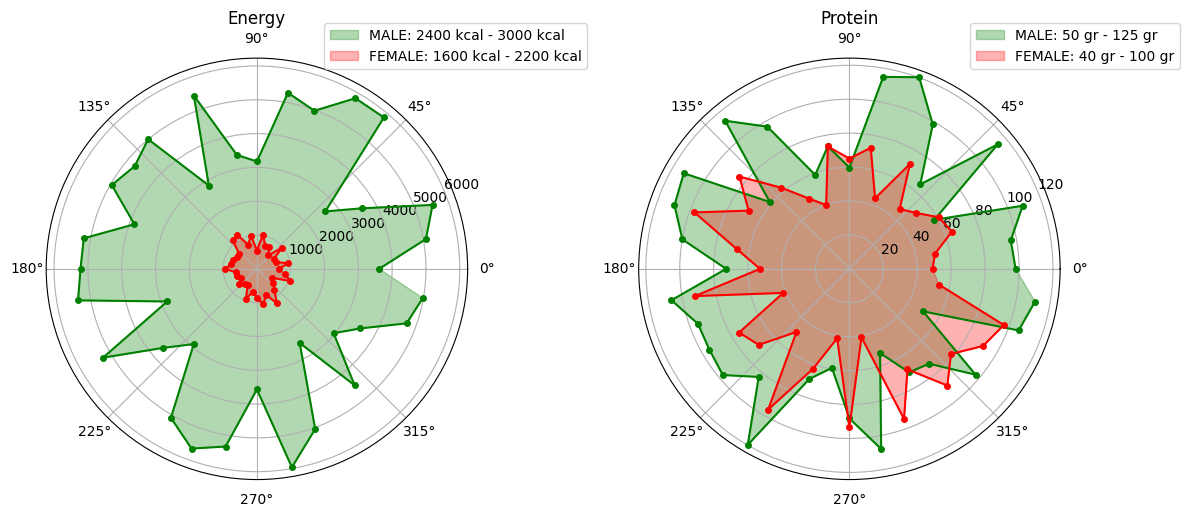

Exemplo com 4 gráficos:


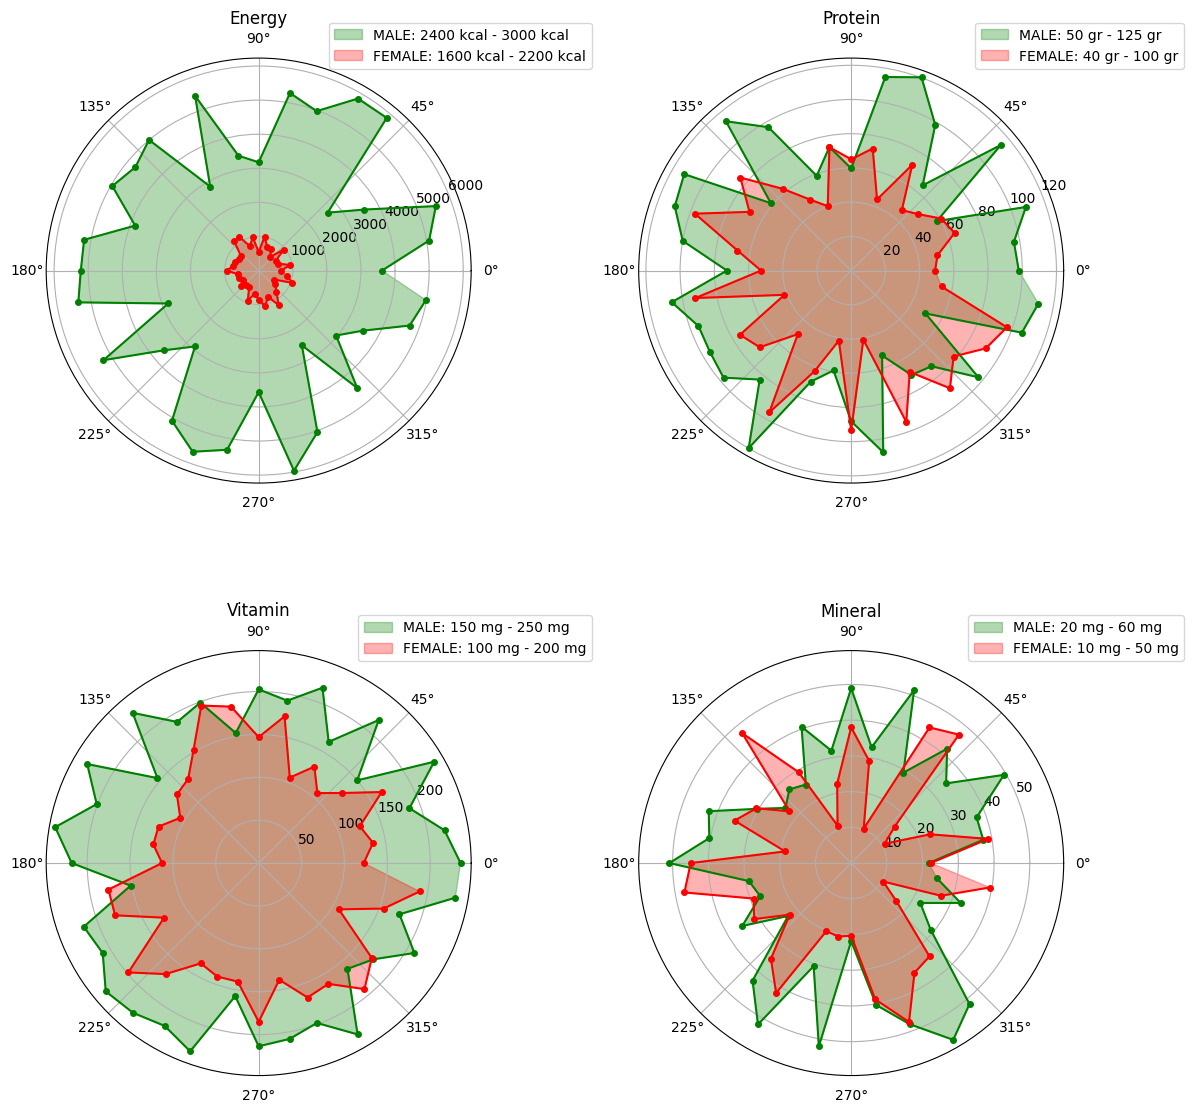

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multiple_polar_charts(data_list, num_points=36):
    """
    Gera múltiplos gráficos polares em uma única imagem.

    Parameters:
    - data_list (list of dict): Lista de dicionários com dados para cada gráfico.
      Cada dicionário deve ter as chaves:
      - "variable_name" (str): Nome da variável.
      - "female_data" (list or np.array): Dados para mulheres.
      - "male_data" (list or np.array): Dados para homens.
      - "female_range" (str): Descrição do intervalo para mulheres.
      - "male_range" (str): Descrição do intervalo para homens.
    - num_points (int): Número de pontos em cada gráfico. Padrão é 36.

    Exemplo de Uso:
    plot_multiple_polar_charts([{"variable_name": "Energy", "female_data": female_energy_data, "male_data": male_energy_data, 
                                 "female_range": "1600 kcal - 2200 kcal", "male_range": "2400 kcal - 3000 kcal"}])
    """
    num_charts = len(data_list)
    
    # Ajuste para layout em uma linha se houver exatamente dois gráficos
    if num_charts == 2:
        rows, cols = 1, 2
    else:
        rows = int(np.ceil(np.sqrt(num_charts)))
        cols = int(np.ceil(num_charts / rows))
    
    fig, axs = plt.subplots(rows, cols, subplot_kw=dict(projection='polar'), figsize=(6 * cols, 6 * rows))
    axs = np.array(axs).flatten()  # Flatten para fácil indexação

    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

    for i, data in enumerate(data_list):
        ax = axs[i]
        
        # Gráfico para dados masculinos
        ax.fill(angles, data["male_data"], color='green', alpha=0.3, label=f'MALE: {data["male_range"]}')
        ax.plot(angles, data["male_data"], color='green', linestyle='-', marker='o', markersize=4)

        # Gráfico para dados femininos
        ax.fill(angles, data["female_data"], color='red', alpha=0.3, label=f'FEMALE: {data["female_range"]}')
        ax.plot(angles, data["female_data"], color='red', linestyle='-', marker='o', markersize=4)

        # Configurações do gráfico
        ax.set_title(data["variable_name"])
        ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

    # Remove os subplots vazios
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Exemplo de entrada para 1, 2 e 4 gráficos
num_points = 36
female_energy_data = np.random.uniform(500, 1200, num_points)
male_energy_data = np.random.uniform(2400, 6000, num_points)
female_protein_data = np.random.uniform(40, 100, num_points)
male_protein_data = np.random.uniform(50, 125, num_points)
female_vitamin_data = np.random.uniform(100, 200, num_points)
male_vitamin_data = np.random.uniform(150, 250, num_points)
female_mineral_data = np.random.uniform(10, 50, num_points)
male_mineral_data = np.random.uniform(20, 60, num_points)

# Exemplos de uso com 1, 2 e 4 gráficos
data_1_chart = [
    {"variable_name": "Energy", "female_data": female_energy_data, "male_data": male_energy_data, 
     "female_range": "1600 kcal - 2200 kcal", "male_range": "2400 kcal - 3000 kcal"}
]

data_2_charts = [
    {"variable_name": "Energy", "female_data": female_energy_data, "male_data": male_energy_data, 
     "female_range": "1600 kcal - 2200 kcal", "male_range": "2400 kcal - 3000 kcal"},
    {"variable_name": "Protein", "female_data": female_protein_data, "male_data": male_protein_data, 
     "female_range": "40 gr - 100 gr", "male_range": "50 gr - 125 gr"}
]

data_4_charts = [
    {"variable_name": "Energy", "female_data": female_energy_data, "male_data": male_energy_data, 
     "female_range": "1600 kcal - 2200 kcal", "male_range": "2400 kcal - 3000 kcal"},
    {"variable_name": "Protein", "female_data": female_protein_data, "male_data": male_protein_data, 
     "female_range": "40 gr - 100 gr", "male_range": "50 gr - 125 gr"},
    {"variable_name": "Vitamin", "female_data": female_vitamin_data, "male_data": male_vitamin_data, 
     "female_range": "100 mg - 200 mg", "male_range": "150 mg - 250 mg"},
    {"variable_name": "Mineral", "female_data": female_mineral_data, "male_data": male_mineral_data, 
     "female_range": "10 mg - 50 mg", "male_range": "20 mg - 60 mg"}
]

# Gerando os gráficos
print("Exemplo com 1 gráfico:")
plot_multiple_polar_charts(data_1_chart)

print("Exemplo com 2 gráficos:")
plot_multiple_polar_charts(data_2_charts)

print("Exemplo com 4 gráficos:")
plot_multiple_polar_charts(data_4_charts)
